# K-Means

Elimideki verileri segmente etmek istediğimizde kullanırız. Customer Segmentation vsvs.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as cp
from sklearn.cluster import KMeans
import seaborn as sns

from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data_set = pd.read_csv("USArrests.csv")
df = data_set.copy()
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


**Veri Setinin Hikayesi:**

Elimizde USA'nın eyaletlerinde işlenen suç oranları var. Amacımız bu suç karekteristliklerini bulup kümelemek.

In [20]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [4]:
df.columns = ["State","Murder","Assault","UrbanPop","Rape"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.index = df.iloc[:,0]
df.head()

,State,Murder,Assault,UrbanPop,Rape
State,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [6]:
#indexi yaraldıktan sonra state değişkenine gerek duymadığımız için kaldırıyoruz.
df_ = df.iloc[:,1:5]
df_.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


del df.column_name  => silersin

In [25]:
df.isnull().values.any()

False

In [26]:
df.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


İnsan davranışlarının oranları verildiği için incelenmesi aynı zamanda sosyalojiyide ilgilendiriyor. <br>
Cinayet, diğer suçlara göre ortalama olarak daha az işlenmişken en çok saldırı suçu işlenmiş. <br>
Genel olarak dağılımarına bakıldığında fena durmuyor. <br>
Mesela cinayet oranı 10.00'dan fazla olanlar "1", az olanları "0" olarak sınıflandırıp "dangerous_area" değişkeni oluşturup \
yeni bir bakış kazanabiliriz. Ya da Cinayet'in kat sayısı arttırılabilir. Buradaki amacımız: Cinayet değişkeninin diğerlerinden daha fazla \
etkilediğini programa bildirmek. Bunu belki bizden proje liderimiz belkide o eyaletin savcısı istemiş olabilir. <br>
İşte yukarıdaki gibi kümelerin şekillerini mekaniklikten çıkarıp, iş bilgisi ekleyerek caseler üzerinde etki sağlayabiliriz. <br> <br>

Şöyle düşün, eğer veri setindeki değişkenleri standartlaştırırsan hepsinin etkisinin aynı olduğunu düşünürsün. Yani sen cinayet ile yaralamayı aynı etkide koyuyorsun. 
Bu eğer bir eyalet mahkemesi tarafından veriliyorsa ciddi sorun oluşturur. Her suçu aynı görüp aynı cezayı vermiş olursun. <br>
Diyelimki standartlaşma yapmadın, fakat bu seferde hiç bir şey yapmadan olduğu gibi verdin seti modele. Bu seferde varyansı çok olan değişkenlerin ağırlığı daha fazla olacak. <br> <br>

Bak, Denetimsiz Öğrenme kolay gibi gözükür ama yukarıdaki gibi ince noktaları vardır. <br> 
Bir şeyin odağında insan varsa, verilerin iyi değerlendirilmesi gerekir.

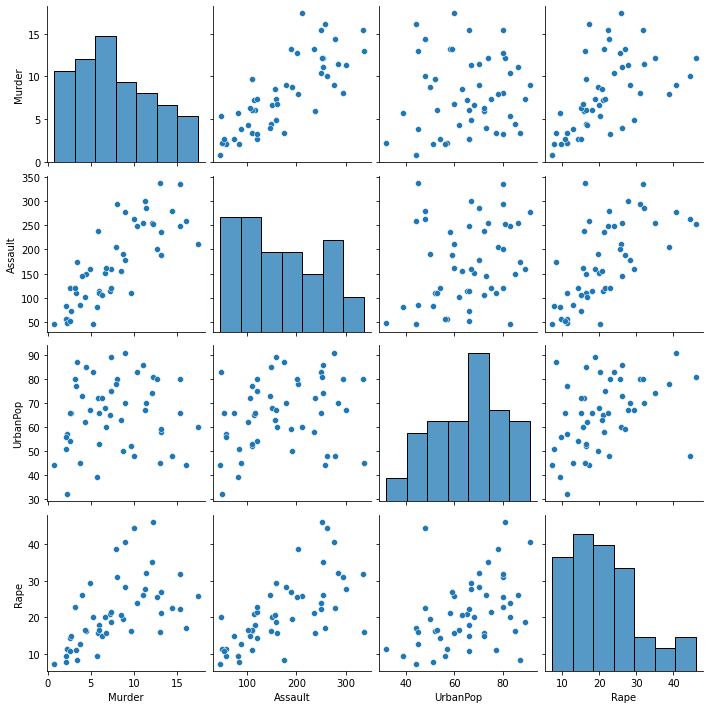

In [33]:
sns.pairplot(data=df)

## K-Means Model Kurma ve Görselleştirme

In [9]:
kmeans = KMeans(n_clusters = 4)
#dir(kmeans)
?kmeans

Type:        KMeans
String form: KMeans(n_clusters=4)
File:        c:\users\mrfrk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py
Docstring:  
K-Means clustering.

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, default=8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
    Method for initialization:

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose `n_clusters` observations (rows) at random from data
    for the initial centroids.

    If an array is passed, it should be of shape (n_clusters, n_features)
    and gives the initial centers.

    If a callable is passed, it should take arguments X, n_clusters and a
    random state and return an i

In [10]:
kmeans.n_clusters

4

In [11]:
k_fit = kmeans.fit(df_)

In [13]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [61]:
# her bir gözlemin hangi kümeye gittiği
k_fit.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

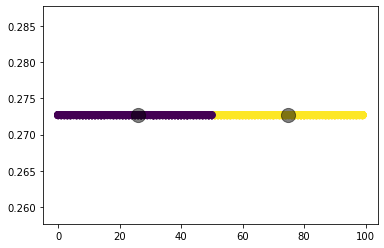

In [63]:
## görselleştirelim kümeleri
kmeans = KMeans(n_clusters = 2)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [68]:
from mpl_toolkits.mplot3d import Axes3D

In [67]:
!pip install --upgrade matplotlib
import mpl_toolkits

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\mrfrk\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:


In [69]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_
merkezler = kmeans.cluster_centers_

IndexError: single positional indexer is out-of-bounds

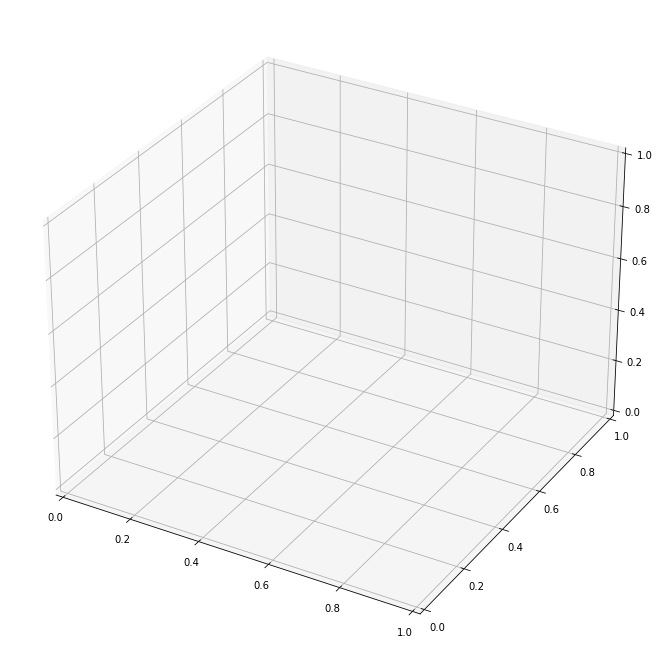

In [70]:
plt.rcParams['figure.figsize'] = (16, 9)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

In [71]:
#kumeler ve gözlem birimleri

In [72]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [73]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,0,1
1,1,2
2,2,2
3,3,1
4,4,0
5,5,0
6,6,0
7,7,2
8,8,0
9,9,1


In [74]:
df["kume_no"] = kumeler

In [75]:
df["kume_no"] = df["kume_no"] + 1

In [76]:
df.head()

,yas,uyku,kume_no
0,73,0.272681,2
1,37,0.272681,3
2,42,0.272681,3
3,80,0.272681,2
4,27,0.272681,1


## Optimum küme sayısının belirlenmesi 

In [77]:
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(df) 
visualizer.poof()  

  Using cached matplotlib-3.7.0-cp39-cp39-win_amd64.whl (7.6 MB)


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\mrfrk\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'yellowbrick'

In [ ]:
kmeans = KMeans(n_clusters = 4)
k_fit = kmeans.fit(df)
kumeler = k_fit.labels_

In [78]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,0,1
1,1,2
2,2,2
3,3,1
4,4,0
5,5,0
6,6,0
7,7,2
8,8,0
9,9,1


# Hiyerarşik kümelme

In [79]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [80]:
from scipy.cluster.hierarchy import linkage
hc_complete = linkage(df, "complete")
hc_average = linkage(df, "average")
hc_single = linkage(df, "single")

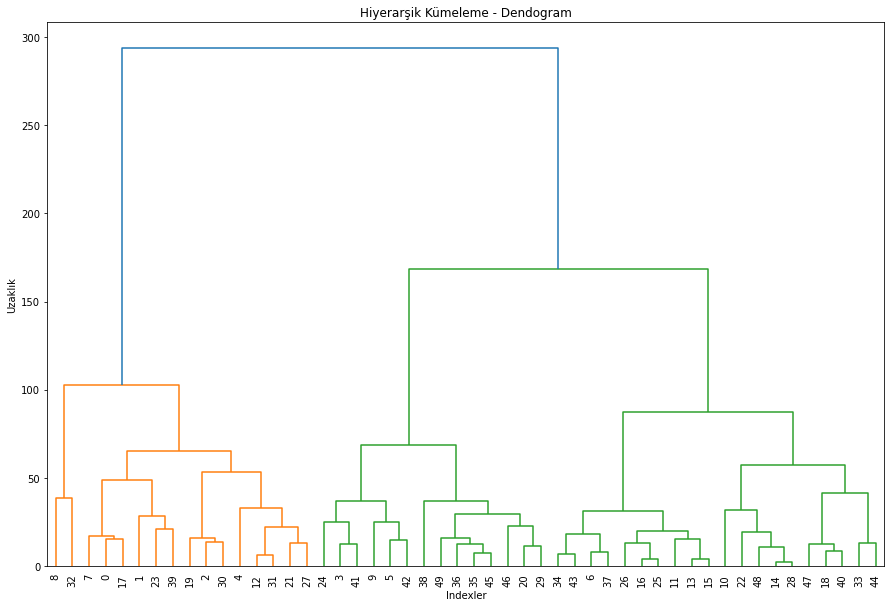

In [81]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    leaf_font_size=10
);

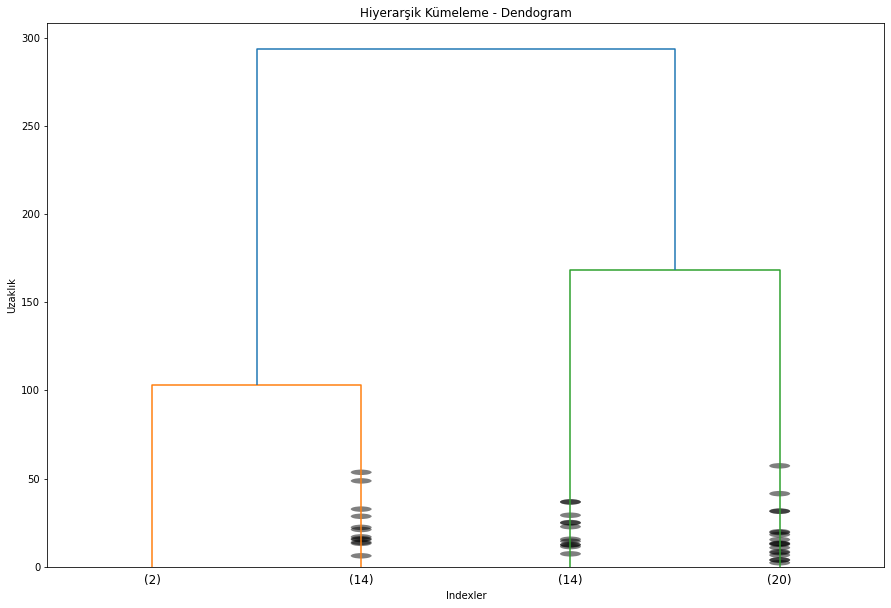

In [82]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
dendrogram(
    hc_complete,
    truncate_mode = "lastp",
    p = 4,
    show_contracted = True
);

## opimum küme saısı 

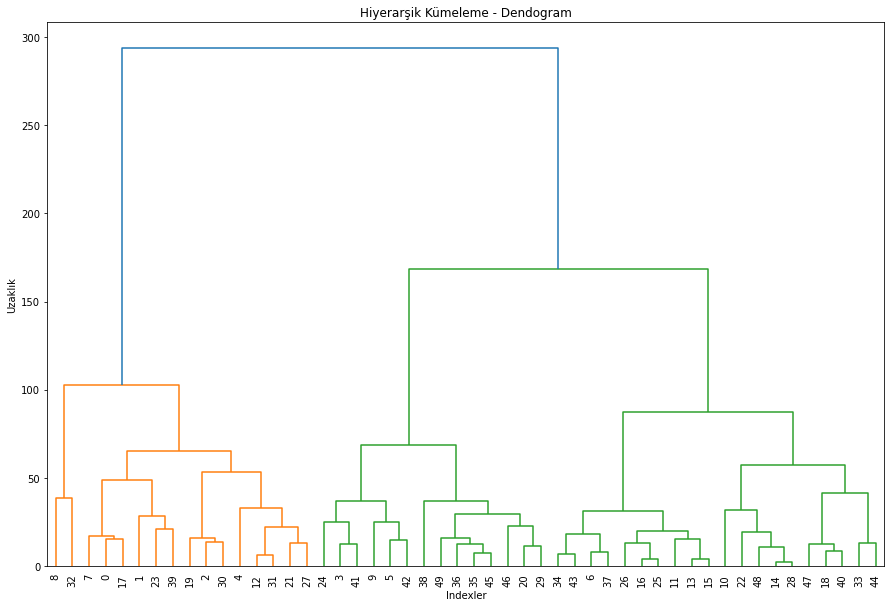

In [83]:
from scipy.cluster.hierarchy import dendrogram

plt.figure(figsize=(15, 10))
plt.title('Hiyerarşik Kümeleme - Dendogram')
plt.xlabel('Indexler')
plt.ylabel('Uzaklık')
den = dendrogram(
    hc_complete,
    leaf_font_size=10
);

In [84]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "ward")

cluster.fit_predict(df)

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [85]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": cluster.fit_predict(df)})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,3
7,Delaware,0
8,Florida,0
9,Georgia,2


In [86]:
df["kume_no"] = cluster.fit_predict(df)

# PCA

In [87]:
df = pd.read_csv("USArrests.csv").copy()
df.index = df.iloc[:,0]
df = df.iloc[:,1:5]
#del df.index.name
df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [88]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)
df[0:5,0:5]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393]])

In [89]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(df)

In [90]:
bilesen_df = pd.DataFrame(data = pca_fit, 
                          columns = ["birinci_bilesen","ikinci_bilesen","ucuncu_bilesen"])

In [91]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [92]:
bilesen_df.head()

,birinci_bilesen,ikinci_bilesen,ucuncu_bilesen
0,0.985566,1.133392,-0.444269
1,1.950138,1.073213,2.040003
2,1.763164,-0.745957,0.054781
3,-0.141420,1.119797,0.114574
4,2.523980,-1.542934,0.598557


In [93]:
pca.explained_variance_ratio_

array([0.62006039, 0.24744129, 0.0891408 ])

In [94]:
pca = PCA().fit(df)

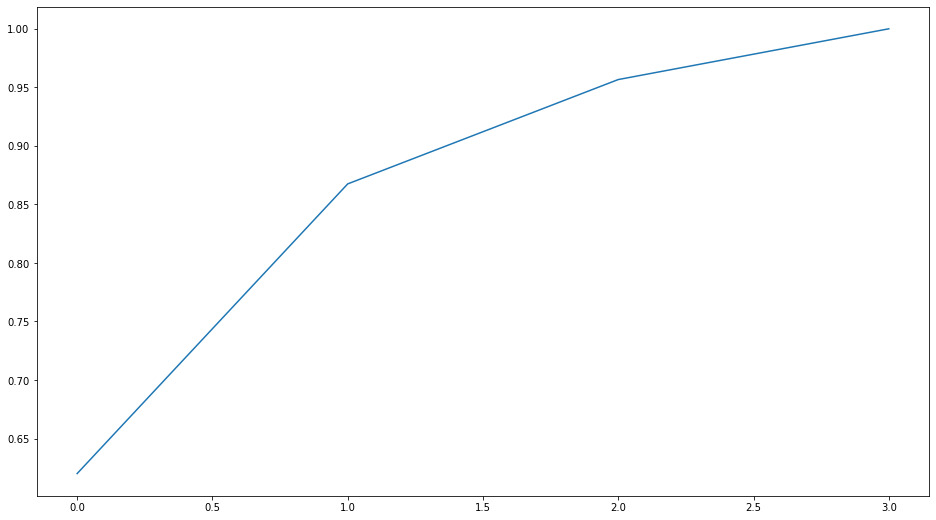

In [95]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))